# HM1: Logistic Regression.

### Name: Atul Gupta
### CWID: 20015539


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [1]:
# Load Packages
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [2]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.2 Examine and clean data

In [3]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
data.drop('id',inplace=True,axis=1)
data.drop('Unnamed: 32',inplace=True,axis=1)

data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == "B" else -1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 31)

## 1.3. Partition to training and testing sets

In [5]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [6]:
y_train = y_train.values.reshape((y_train.shape[0],1))
y_test = y_test.values.reshape((y_test.shape[0],1))

In [7]:
x_train.shape

(455, 30)

In [8]:
y_train.shape

(455, 1)

## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [9]:
# Standardization
import numpy as np

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = np.mean(x_train, axis=0).values.reshape(1, d)
sig = np.std(x_train, axis=0).values.reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(np.mean(x_test, axis=0))
print()
print('test std = ')
print(np.std(x_test, axis=0))

test mean = 
radius_mean                0.085380
texture_mean               0.014310
perimeter_mean             0.071169
area_mean                  0.062798
smoothness_mean           -0.120151
compactness_mean          -0.111335
concavity_mean            -0.048705
concave points_mean        0.001621
symmetry_mean             -0.174717
fractal_dimension_mean    -0.167887
radius_se                 -0.048978
texture_se                 0.151420
perimeter_se              -0.061065
area_se                   -0.043889
smoothness_se             -0.116688
compactness_se            -0.148538
concavity_se              -0.097439
concave points_se         -0.047496
symmetry_se               -0.071781
fractal_dimension_se      -0.163372
radius_worst               0.062224
texture_worst              0.090598
perimeter_worst            0.042938
area_worst                 0.035229
smoothness_worst          -0.102307
compactness_worst         -0.115950
concavity_worst           -0.075944
concave points_

In [10]:
# Adding bias terms
x_train = np.concatenate((x_train, np.ones((x_train.shape[0], 1))), axis=1)
x_test = np.concatenate((x_test, np.ones((x_test.shape[0], 1))), axis=1)


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [11]:
# Calculate the objective function value, or loss
# Inumpyuts:
#     w: weight: d-by-1 vector
#     x: data: n-by-d matrix
#     y: label: n-by-1 vector
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)

def objective(w, x, y, lam):
    loss = np.mean(np.log(1 + np.exp(-((y * x) @ w))))
    reg = (lam / 2) * np.sum(w * w)
    return loss + reg   

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [12]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

# Implementing gradient function for Logistic Regression.

def gradient(w, x, y, lam):
    n = x.shape[0]
    d = x.shape[1]
    return -np.mean((y * x) / (1 + np.exp((y * x) @ w)), axis=0).reshape(d, 1) + lam * w

In [13]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 vector, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 vector, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    n = x.shape[0]
    d = x.shape[1]
    
    
    w_temp = np.zeros((max_epoch, d, 1))
    obj_vals = np.zeros(max_epoch)
    
    # Calculating gradient for each epoch
    for i in range(max_epoch):
        g = gradient(w, x, y, lam)
        w -= learning_rate * g
        w_temp[i] = w
        
        obj_vals[i] = objective(w, x, y, lam)
        
    # Final weight set is the one where objective function is minimized
    w_final = w_temp[np.argmin(obj_vals)]
    
    return w_final, obj_vals

In [14]:
#Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.


In [15]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
d = x_train.shape[1]
learning_rate = 0.01
w = np.zeros((d, 1))
weights_gd, objective_gd = gradient_descent(x_train, y_train, 0, learning_rate, w)

In [16]:
weights_gd

array([[-0.15454099],
       [-0.1092948 ],
       [-0.1556063 ],
       [-0.14842088],
       [-0.06267262],
       [-0.10351212],
       [-0.13041099],
       [-0.15761374],
       [-0.0596925 ],
       [ 0.0253307 ],
       [-0.1147995 ],
       [-0.00098386],
       [-0.1077451 ],
       [-0.10797673],
       [ 0.01888471],
       [-0.02991127],
       [-0.01653561],
       [-0.06088947],
       [ 0.01452012],
       [ 0.01790654],
       [-0.1688968 ],
       [-0.12141975],
       [-0.16697165],
       [-0.15697761],
       [-0.09012981],
       [-0.11374993],
       [-0.12656481],
       [-0.16341858],
       [-0.0937316 ],
       [-0.05698557],
       [ 0.09654289]])

In [17]:
# Finding the minima

min(objective_gd)

0.2510258019082143

In [18]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
d = x_train.shape[1]
learning_rate = 0.01
w = np.zeros((d, 1))
# here we are using lam = 1 as regularization parameter. Typical values range from 0.01 to 10.
weights_reg_gd, objective_reg_gd = gradient_descent(x_train, y_train, 1, learning_rate, w)

In [19]:
weights_reg_gd

array([[-0.10506718],
       [-0.07353052],
       [-0.10589652],
       [-0.1007042 ],
       [-0.04371891],
       [-0.07242819],
       [-0.09013714],
       [-0.10792781],
       [-0.04174307],
       [ 0.01501212],
       [-0.07768382],
       [-0.0007107 ],
       [-0.07312157],
       [-0.07283979],
       [ 0.01272563],
       [-0.02334473],
       [-0.01449553],
       [-0.04409611],
       [ 0.00921965],
       [ 0.00904501],
       [-0.1146355 ],
       [-0.08165786],
       [-0.1135105 ],
       [-0.10636365],
       [-0.0617551 ],
       [-0.07912337],
       [-0.08785943],
       [-0.11232844],
       [-0.06410717],
       [-0.04072895],
       [ 0.06528689]])

In [20]:
# Finding the minima

min(objective_reg_gd)

0.41353932992773285

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [21]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    d = xi.shape[0]
    obj = objective(w, xi, yi, lam)
    
    g_main = -(yi * xi) / (1 + np.exp((yi * xi) @ w))
    g_reg = lam * w
    g = g_main.reshape((d, 1)) + g_reg
    return obj, g

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [22]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    n = x.shape[0]
    d = x.shape[1]
    
    obj_vals = np.zeros(max_epoch)
    w_temp = np.zeros((max_epoch, d, 1))

    for t in range(max_epoch):
        curr_obj = 0
        
        # Randomly selecting a part of the data set
        index = np.random.permutation(n)
        x_epoch, y_epoch = x[index, :],y[index, :]
        
        for i in range(n):
            xi = x_epoch[i, :]
            yi = float(y_epoch[i, :])
            obj_iter, grad = stochastic_objective_gradient(w, xi, yi, lam)
            curr_obj += obj_iter
            w -= learning_rate * grad
        
        learning_rate *= 0.9
        curr_obj = curr_obj/ n
        obj_vals[t] = curr_obj
        w_temp[t] = w
    
    w_final = w_temp[np.argmin(obj_vals)]
    return w_final, obj_vals

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [23]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
learning_rate = 0.1
weights_sgd, objective_sgd = sgd(x_train, y_train, 0, learning_rate, w)

/var/folders/3x/l22y8j213vv7scx_kjrcwsb40000gn/T/ipykernel_48576/3520234027.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yi = float(y_epoch[i, :])


In [24]:
min(objective_sgd)

0.051155204175828875

In [25]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.01
learning_rate = 0.1
weights_reg_sgd, objective_reg_sgd = sgd(x_train, y_train, lam, learning_rate, w)

/var/folders/3x/l22y8j213vv7scx_kjrcwsb40000gn/T/ipykernel_48576/3520234027.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yi = float(y_epoch[i, :])


In [26]:
min(objective_reg_sgd)

0.10326979833983198

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [27]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    b = xi.shape[0]
    d = xi.shape[1]
    obj = objective(w, xi, yi, lam)
    g = gradient(w, xi, yi, lam)
    return obj, g

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [28]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def create_batches(size, batch_size):
    num_batches = size // batch_size
    if (size % batch_size > batch_size // 2):
        num_batches += 1
    batches = []
    
    # Randomly permutating the dataset
    perm = np.random.permutation(size)
    
    for i in range(num_batches - 1):
        start = i * batch_size
        end = (i + 1) * batch_size
        batches.append(perm[start: end])
    
    # Adding remaining items to final batch
    batches.append(perm[end:])
    return batches

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    n = x.shape[0]
    d = x.shape[1]
    
    batch_size = 10
    
    obj_vals = np.zeros(max_epoch)
    w_temp = np.zeros((max_epoch, d, 1))
    
    for t in range(max_epoch):
        batches = create_batches(n, batch_size)
        num_batches = len(batches)
        
        curr_obj = 0
        for i in range(num_batches):
            xi = x_train[batches[i], :]
            yi = y_train[batches[i], :]
            batch_obj, g = mb_objective_gradient(w, xi, yi, lam)
            curr_obj += batch_obj
            w -= learning_rate * g
            
        w_temp[t] = w
        curr_obj *= batch_size / n
        obj_vals[t] = curr_obj
        learning_rate *= 0.9

    w_final = w_temp[np.argmin(obj_vals)]
    return w_final, obj_vals

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [29]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
learning_rate = 0.3
weights_mbgd, objective_mbgd = mbgd(x_train, y_train, 0, learning_rate, w)

In [30]:
min(objective_mbgd)

0.053231728954023554

In [31]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0.1
learning_rate = 0.3
weights_reg_mbgd, objective_reg_mbgd = mbgd(x_train, y_train, lam, learning_rate, w)

In [32]:
min(objective_reg_mbgd)

0.20182114071932727

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

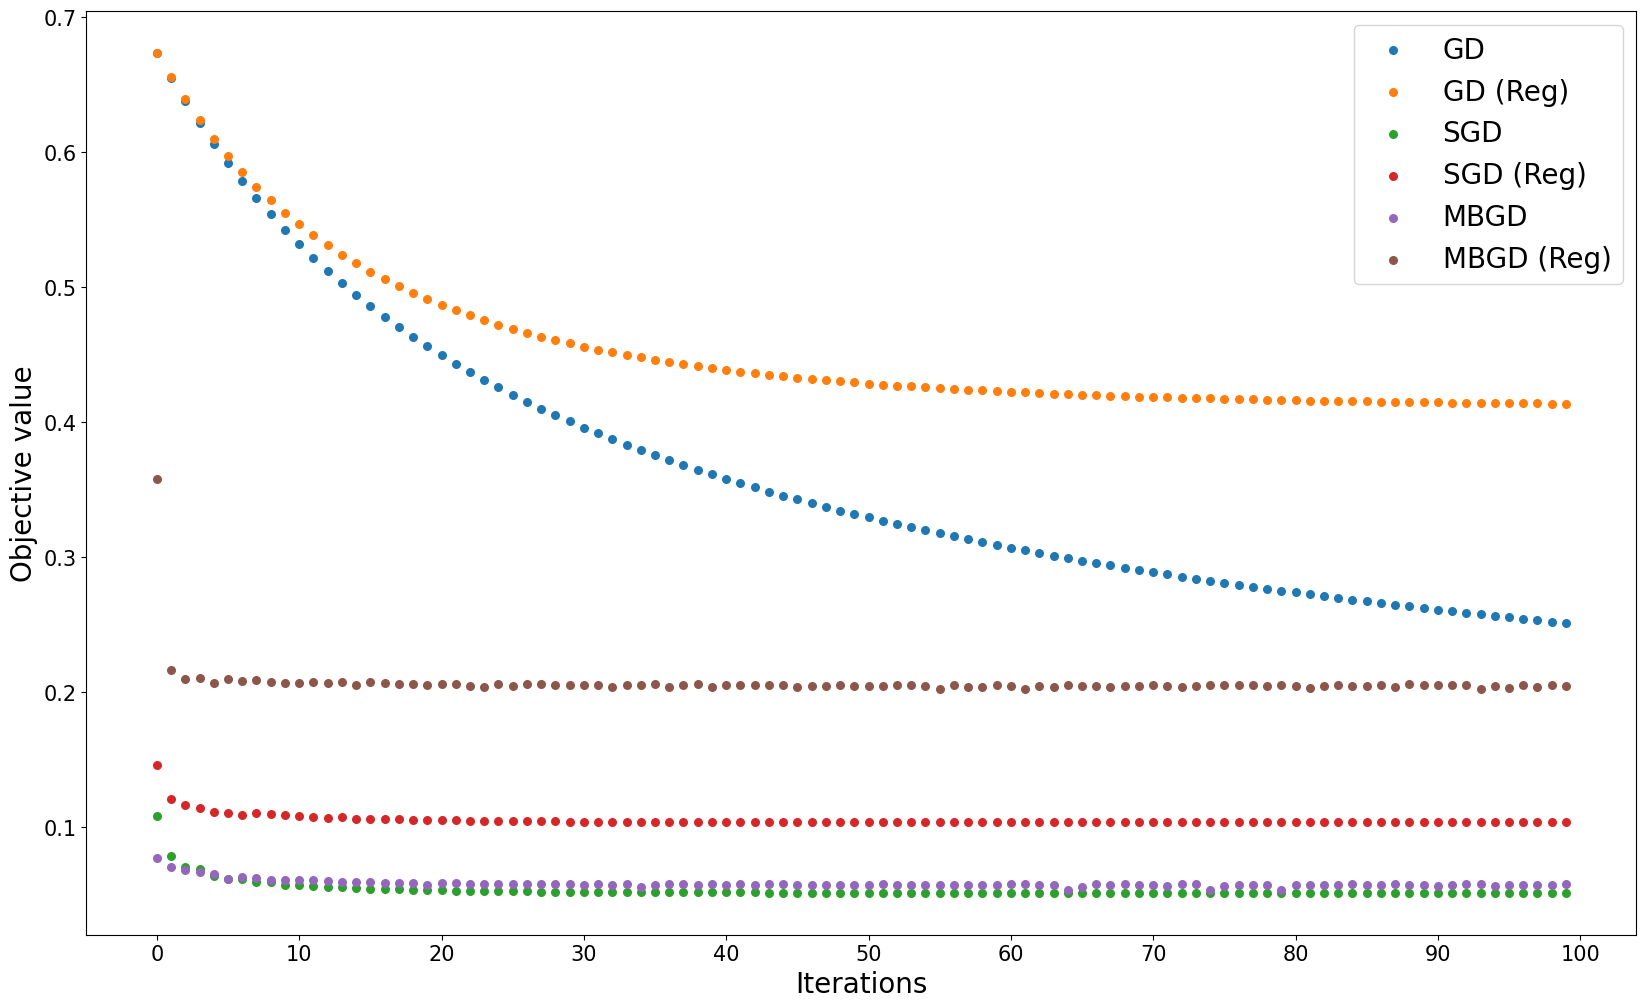

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 12))

epochs_list = range(len(objective_gd))

plt.scatter(epochs_list, objective_gd, marker='o', s=30)
plt.scatter(epochs_list, objective_reg_gd, marker='o', s=30)
plt.scatter(epochs_list, objective_sgd, marker='o', s=30)
plt.scatter(epochs_list, objective_reg_sgd, marker='o', s=30)
plt.scatter(epochs_list, objective_mbgd, marker='o', s=30)
plt.scatter(epochs_list, objective_reg_mbgd, marker='o', s=30)

plt.xlabel('Iterations', fontsize=20)
plt.ylabel('Objective value', fontsize=20)
plt.xticks(range(0, 101, 10), fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['GD', 'GD (Reg)', 'SGD', 'SGD (Reg)', 'MBGD', 'MBGD (Reg)'], fontsize=20)
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [34]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    return np.sign(X @ w)
    
def error(f,y):
    diff = (f != y).astype(int)
    error = np.mean(diff)
    return error

In [35]:
# evaluate training error of logistric regression and regularized version

# Using the predict function to get predicted values
predictions_train_gd = predict(weights_gd, x_train)
# Comparing predictions with actual values and calculating error
error_train_gd = error(predictions_train_gd, y_train)

predictions_train_reg_gd = predict(weights_reg_gd, x_train)
error_train_gd_reg = error(predictions_train_reg_gd, y_train)

predictions_train_sgd = predict(weights_sgd, x_train)
error_train_sgd = error(predictions_train_sgd, y_train)

predictions_train_reg_sgd = predict(weights_reg_sgd, x_train)
error_train_sgd_reg = error(predictions_train_reg_sgd, y_train)

predictions_train_mbgd = predict(weights_mbgd, x_train)
error_train_mbgd = error(predictions_train_mbgd, y_train)

predictions_train_reg_mbgd = predict(weights_reg_mbgd, x_train)
error_train_mbgd_reg = error(predictions_train_reg_mbgd, y_train)

data = [
    ("Gradient Descent", error_train_gd),
    ("Stochastic Gradient Descent", error_train_sgd),
    ("Mini Batch Gradient Descent", error_train_mbgd),
    ("Gradient Descent (Regularized)", error_train_gd_reg),
    ("Stochastic Gradient Descent (Regularized)", error_train_sgd_reg),
    ("Mini Batch Gradient Descent (Regularized)", error_train_mbgd_reg)
]

print("Algorithm                                Training Error")
print("-" * 60)

for algorithm, err in data:
    print(f"{algorithm:<40} {err}")

Algorithm                                Training Error
------------------------------------------------------------
Gradient Descent                         0.04395604395604396
Stochastic Gradient Descent              0.013186813186813187
Mini Batch Gradient Descent              0.013186813186813187
Gradient Descent (Regularized)           0.04835164835164835
Stochastic Gradient Descent (Regularized) 0.013186813186813187
Mini Batch Gradient Descent (Regularized) 0.02197802197802198


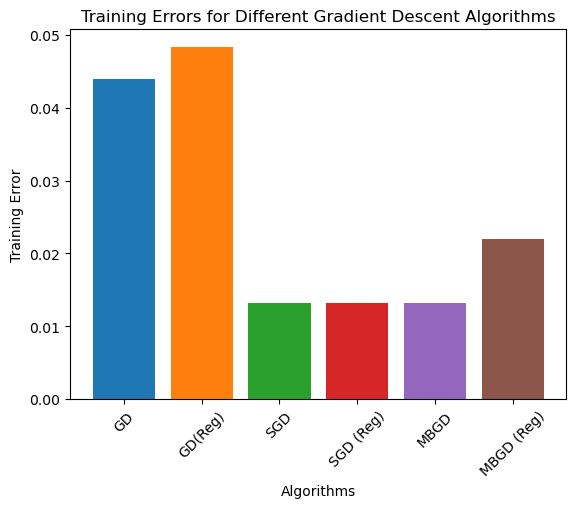

In [36]:
# Plotting the errors
plt.bar(height=error_train_gd, x='GD')
plt.bar(height=error_train_gd_reg, x='GD(Reg)')
plt.bar(height=error_train_sgd, x='SGD')
plt.bar(height=error_train_sgd_reg, x='SGD (Reg)')
plt.bar(height=error_train_mbgd, x='MBGD')
plt.bar(height=error_train_mbgd_reg, x='MBGD (Reg)')

plt.xlabel('Algorithms')
plt.ylabel('Training Error')
plt.title('Training Errors for Different Gradient Descent Algorithms')
plt.xticks(rotation=45)

plt.show()

In [37]:
# evaluate testing error of logistric regression and regularized version
predictions_test_gd = predict(weights_gd, x_test)
error_test_gd = error(predictions_test_gd, y_test)

predictions_test_gd_reg = predict(weights_reg_gd, x_test)
error_test_gd_reg = error(predictions_test_gd_reg, y_test)

predictions_test_sgd = predict(weights_sgd, x_test)
error_test_sgd = error(predictions_test_sgd, y_test)

predictions_test_sgd_reg = predict(weights_reg_sgd, x_test)
error_test_sgd_reg = error(predictions_test_sgd_reg, y_test)

predictions_test_mbgd = predict(weights_mbgd, x_test)
error_test_mbgd = error(predictions_test_mbgd, y_test)

predictions_test_mbgd_reg = predict(weights_reg_mbgd, x_test)
error_test_mbgd_reg = error(predictions_test_mbgd_reg, y_test)

data = [
    ("Gradient Descent", error_test_gd),
    ("Stochastic Gradient Descent", error_test_sgd),
    ("Mini Batch Gradient Descent", error_test_mbgd),
    ("Gradient Descent (Regularized)", error_test_gd_reg),
    ("Stochastic Gradient Descent (Regularized)", error_test_sgd_reg),
    ("Mini Batch Gradient Descent (Regularized)", error_test_mbgd_reg)
]

print("Algorithm                                Testing Error")
print("-" * 60)

for algorithm, err in data:
    print(f"{algorithm:<40} {err}")

Algorithm                                Testing Error
------------------------------------------------------------
Gradient Descent                         0.05263157894736842
Stochastic Gradient Descent              0.02631578947368421
Mini Batch Gradient Descent              0.02631578947368421
Gradient Descent (Regularized)           0.06140350877192982
Stochastic Gradient Descent (Regularized) 0.008771929824561403
Mini Batch Gradient Descent (Regularized) 0.02631578947368421


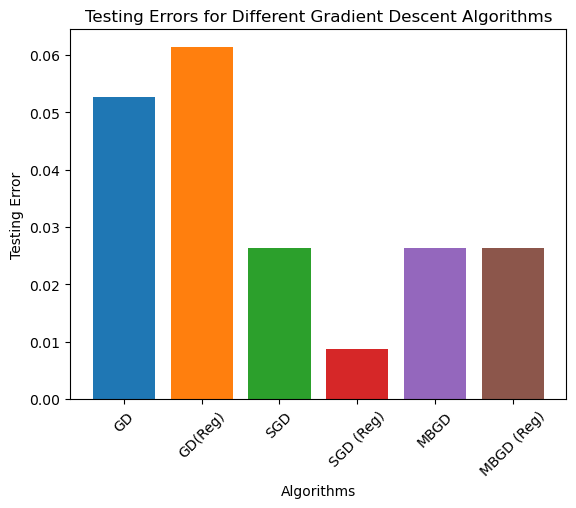

In [38]:
# Plotting the errors
plt.bar(height=error_test_gd, x='GD')
plt.bar(height=error_test_gd_reg, x='GD(Reg)')
plt.bar(height=error_test_sgd, x='SGD')
plt.bar(height=error_test_sgd_reg, x='SGD (Reg)')
plt.bar(height=error_test_mbgd, x='MBGD')
plt.bar(height=error_test_mbgd_reg, x='MBGD (Reg)')

plt.xlabel('Algorithms')
plt.ylabel('Testing Error')
plt.title('Testing Errors for Different Gradient Descent Algorithms')
plt.xticks(rotation=45)

plt.show()

# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [39]:
lam = 3
learning_rate = 0.10

weights_gd, objective_gd = gradient_descent(x_train, y_train, lam, learning_rate, w)
weights_sgd, objective_sgd = sgd(x_train, y_train, lam, learning_rate, w)
weights_mbgd, objective_mbgd = mbgd(x_train, y_train, lam, learning_rate, w)

predictions_gd = predict(weights_gd,x_train)
predictions_sgd = predict(weights_sgd,x_train)
predictions_mbgd = predict(weights_mbgd,x_train)

error_gd = error(predictions_gd, y_train)
error_sgd = error(predictions_sgd, y_train)
error_mbgd = error(predictions_mbgd, y_train)

data = [
    ("Gradient Descent", error_gd),
    ("Stochastic Gradient Descent", error_sgd),
    ("Mini Batch Gradient Descent", error_mbgd),
]

print("Algorithm                                Tuning Error")
print("-" * 60)

for algorithm, err in data:
    print(f"{algorithm:<40} {err}")

/var/folders/3x/l22y8j213vv7scx_kjrcwsb40000gn/T/ipykernel_48576/3520234027.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yi = float(y_epoch[i, :])


Algorithm                                Tuning Error
------------------------------------------------------------
Gradient Descent                         0.05934065934065934
Stochastic Gradient Descent              0.05934065934065934
Mini Batch Gradient Descent              0.05934065934065934


In [40]:
lam = 0.1
learning_rate = 0.1

weights_gd, objective_gd = gradient_descent(x_train, y_train, lam, learning_rate, w)
weights_sgd, objective_sgd = sgd(x_train, y_train, lam, learning_rate, w)
weights_mbgd, objective_mbgd = mbgd(x_train, y_train, lam, learning_rate, w)

predictions_gd = predict(weights_gd,x_train)
predictions_sgd = predict(weights_sgd,x_train)
predictions_mbgd = predict(weights_mbgd,x_train)

error_gd = error(predictions_gd, y_train)
error_sgd = error(predictions_sgd, y_train)
error_mbgd = error(predictions_mbgd, y_train)

data = [
    ("Gradient Descent", error_gd),
    ("Stochastic Gradient Descent", error_sgd),
    ("Mini Batch Gradient Descent", error_mbgd),
]

print("Algorithm                                Tuning Error")
print("-" * 60)

for algorithm, err in data:
    print(f"{algorithm:<40} {err}")

/var/folders/3x/l22y8j213vv7scx_kjrcwsb40000gn/T/ipykernel_48576/3520234027.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yi = float(y_epoch[i, :])


Algorithm                                Tuning Error
------------------------------------------------------------
Gradient Descent                         0.026373626373626374
Stochastic Gradient Descent              0.02197802197802198
Mini Batch Gradient Descent              0.02197802197802198
